In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import seaborn as sns
import numpy as np

In [2]:
import os

print("Current Working Directory:", os.getcwd())


Current Working Directory: /home/augre/ar_star_ws/src/ar-star/data/tahri_2023/post_tlx


In [3]:
# import csv
data_path = 'nasa_tlx_results.csv'

# Load SUS data from CSV
try:
    data = pd.read_csv(data_path)
except FileNotFoundError:
    print(f"Error: File '{data_path}' not found.")
    exit()


In [4]:
# parse data
categories = ['MentalDemand', 'PhysicalDemand', 'TemporalDemand', 'Performance', 'Effort', 'Frustration']
data_grouped = data.groupby('Modality')

# init
shape_mode = []
highlight_mode = []
lasso_mode = []
modes = [shape_mode, highlight_mode, lasso_mode]

# loop through each modality
for i in range(0, len(data_grouped)):
    # loop through each category in each modality
    for j, cat in enumerate(categories):
        print(data_grouped[cat].mean()[i])
        modes[i].append(data_grouped[cat].mean()[i])

9.2
5.4
5.0
6.8
8.4
6.8
7.0
6.0
3.6
6.8
8.6
6.2
8.6
5.0
4.0
6.8
8.4
7.4


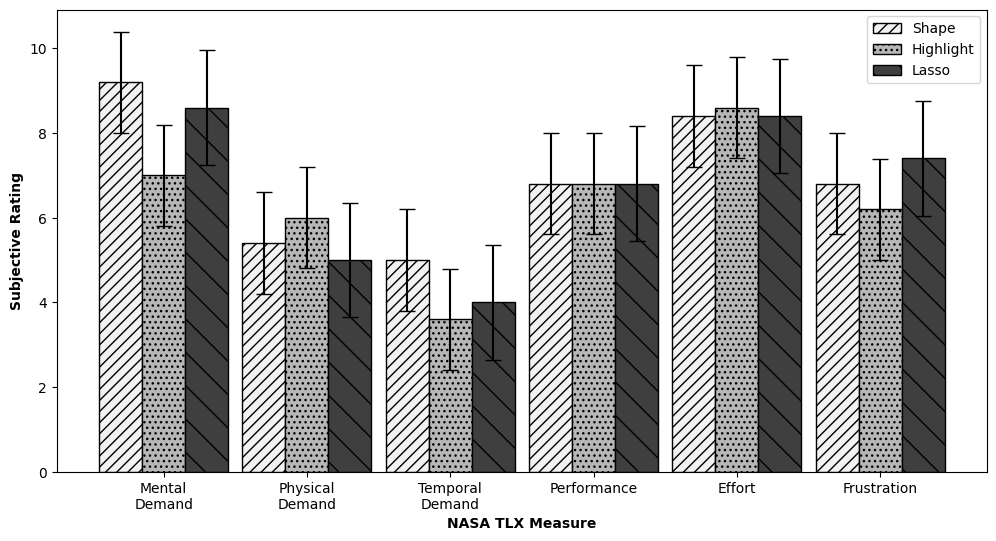

In [7]:
plt.figure(figsize=(12,6))

# Set up the bar positions
bar_width = 0.3
index = np.arange(len(categories))

# Calculate 95% confidence intervals (assuming normally distributed data)
conf_interval = 1.96  # For a 95% confidence interval

errors = []
for i, values in enumerate(modes):
    errors.append(conf_interval * np.std(values) / np.sqrt(len(values)))

# Create the grouped bars with error bars
plt.bar(index - bar_width, modes[0], bar_width, yerr=errors[0], capsize=6, label='Shape', color='#e6e6e6', hatch='///',edgecolor='black')
plt.bar(index, modes[1], bar_width, yerr=errors[1], capsize=6, label='Highlight', color='#c8c8c8', hatch='...',edgecolor='black')
plt.bar(index + bar_width, modes[2], bar_width, yerr=errors[2], capsize=6, label='Lasso', color='#aaaaaa', hatch='\\',edgecolor='black')

categories_clean = ['Mental\nDemand', 'Physical\nDemand', 'Temporal\nDemand', 'Performance', 'Effort', 'Frustration']
# Customize the plot
plt.ylabel('Subjective Rating', weight='bold')
plt.xlabel('NASA TLX Measure', weight='bold')
plt.xticks(index, categories_clean)
plt.legend()

# Save as SVG and PNG
plt.savefig('nasa_tlx_results.svg', format='svg',bbox_inches='tight')
plt.savefig('nasa_tlx_results.png', format='png', dpi=300,bbox_inches='tight')  # Adjust dpi for higher resolution if needed

# Show the plot
plt.show()

In [6]:
# Perform ANOVA for statistical comparison

for i, cat in enumerate(categories) :
    modality_groups = [subset[cat] for modality, subset in data_grouped]
    f_statistic, p_value = f_oneway(*modality_groups)
    # Display ANOVA results
    print("\nANOVA Results for " + cat)
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")


ANOVA Results for MentalDemand
F-statistic: 0.7918367346938776
P-value: 0.47531779828011855

ANOVA Results for PhysicalDemand
F-statistic: 0.09429280397022331
P-value: 0.9106837859091178

ANOVA Results for TemporalDemand
F-statistic: 0.4785276073619632
P-value: 0.6310294375008224

ANOVA Results for Performance
F-statistic: 4.938786880844046e-48
P-value: 1.0

ANOVA Results for Effort
F-statistic: 0.005988023952095808
P-value: 0.9940328367586424

ANOVA Results for Frustration
F-statistic: 0.13775510204081634
P-value: 0.8726702411897505
